``cv2.kmeans`` Syntax: 

``retval, bestlabels, centers = cv2.kmeans(data, k, bestLabels, criteria, attempts, flags[, centers])`` 

``criteria`` is a set of tuple of three parameters

- ``type`` Type of termination criteria. It has three flags

    - ``cv2.TERM_CRITERIA_EPS``, Algorithm stops when the specified accuracy i.e., ``epsilon`` reached
    
    - ``cv2.TERM_CRITERIA_MAX_ITER`` Algorithm stops when the specified number of iterations ``max_iter`` is reached.

    - ``cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER`` Algorithm stops when any of the two condition is reached.

- ``max_iter`` Maximum number of iteration
- ``epsilon`` Required accuracy

``attempts`` specifies the number of times the algorithm is executed using different initial labelings

``flags`` specifies how initial centers are taken

- ``cv2.KMEANS_RANDOM_CENTERS`` flag selects random initial centers in each attempt
- ``cv2.KMEANS_PP_CENTERS`` flag uses the k-means++ center initialization 

Return Values are:

- ``bestLabels`` An integer array that stores the cluster indices for each sample

- ``centers`` An array that contains the center for each cluster

- ``compactness`` The sum of the squared distance from each point to their corresponding centers.

In [12]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [13]:
#creating data with three different clusters

data = np.float32(np.vstack(
    (np.random.randint(0, 40, (50, 2)), np.random.randint(30, 70, (50, 2)), np.random.randint(60, 100, (50, 2)))))

In [14]:
#Defining the CRITERIA

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)

In [15]:
#Applying K-MEANS
#k =3, attempt = 10

ret, label, center = cv2.kmeans(data, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [16]:
#Now separating the data using label layout (stores the cluster indices for every sample)
#Therefore, we split the data to different clusters depending on their labels

A = data[label.ravel() == 0]
B = data[label.ravel() == 1]

In [17]:
fig = plt.figure(figsize=(15, 20))
plt.suptitle("K-Means Clustering")
plt.rcParams['figure.facecolor'] = "silver"

<Figure size 1080x1440 with 0 Axes>

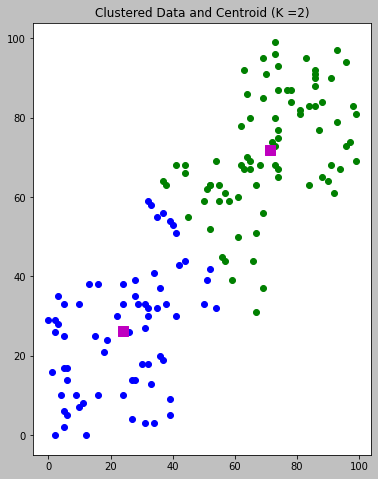

In [18]:
ax = plt.subplot(1, 2, 2)
plt.scatter(A[:, 0], A[:, 1], c = 'b')
plt.scatter(B[:, 0], B[:, 1], c = 'g')
plt.scatter(center[:, 0], center[:, 1], s =100, c = 'm', marker='s')
plt.title("Clustered Data and Centroid (K =2)")

plt.subplots_adjust(top=3,bottom=1.5, right=2, left=0.2, wspace=0.3, hspace=0.3)
plt.show()